#  A Máquina Enigma: História, Funcionamento e Implementação em Python

Este trabalho foi desenvolvido por Antônio Batista, Bernardo Quintella e Dilmar Castanheiro para a disciplina de Álgebra e Criptografia ministrada por Luciano Castro na FGV-EMAp no segundo semestre de 2025.

A Máquina Enigma é um dos dispositivos criptográficos mais famosos da história, intimamente ligada aos eventos da Segunda Guerra Mundial. Sua complexidade e o esforço monumental para decifrá-la moldaram o curso da história e lançaram as bases para a ciência da computação moderna.

Este notebook é dividido em três partes:
1.  **A História da Enigma**: Desde sua invenção até a quebra de seu código.
2.  **O Funcionamento Técnico**: Uma explicação detalhada de seus componentes eletromecânicos.
3.  **Implementação em Python**: Construção de uma simulação, passo a passo.

---

## Parte 1: A História da Enigma

### 1.1. Origem e Uso Comercial

A Enigma foi inventada pelo engenheiro alemão **Arthur Scherbius** no final da Primeira Guerra Mundial, em 1918 [1]. Inicialmente, ela foi concebida para uso comercial, oferecendo um nível de segurança de comunicação sem precedentes para bancos e empresas. O primeiro modelo, a **Enigma A**, foi patenteado e vendido a partir de 1923.

No entanto, foi a adoção pelas Forças Armadas Alemãs (Wehrmacht) que a catapultou para a história. O Exército Alemão (Heer) e a Marinha (Kriegsmarine) começaram a usar versões modificadas da máquina no final da década de 1920, buscando uma comunicação secreta e impenetrável [2].

### 1.2. A Enigma Militar (Wehrmacht)

A versão militar mais comum, a **Enigma I**, era eletromecânica e possuía características de segurança aprimoradas em relação aos modelos comerciais:

*   **Painel de Conexões (Plugboard)**: Um componente que permitia a troca de pares de letras antes e depois da cifragem pelos rotores, aumentando drasticamente o número de combinações possíveis.
*   **Rotores Fixos e Selecionáveis**: Inicialmente com três rotores de um conjunto de cinco, que podiam ser trocados e posicionados em qualquer ordem.

Durante a Segunda Guerra Mundial, a Enigma foi a principal ferramenta de comunicação secreta da Alemanha Nazista, utilizada para coordenar movimentos de tropas, submarinos (U-boats) e operações aéreas.

### 1.3. A Quebra do Código (Bletchley Park)

A história da Enigma não estaria completa sem a menção à sua decifração.

1.  **O Trabalho Polonês**: O primeiro avanço significativo veio da Polônia. Em 1932, o matemático **Marian Rejewski** conseguiu reconstruir a fiação interna dos rotores da Enigma, usando matemática pura e técnicas de criptoanálise [3]. Ele e seus colegas, **Jerzy Różycki** e **Henryk Zygalski**, desenvolveram as primeiras máquinas de decifração, incluindo as "Bombas Criptológicas" (Bomba kryptologiczna).
2.  **Bletchley Park e Alan Turing**: Com a invasão da Polônia, o conhecimento sobre a Enigma foi compartilhado com a França e o Reino Unido. No centro de criptoanálise britânico, Bletchley Park, o matemático **Alan Turing** liderou a equipe que aprimorou a "Bomba" polonesa, criando a **"Bombe"** eletromecânica [4]. Esta máquina era capaz de testar rapidamente as configurações diárias da Enigma, reduzindo o tempo de decifração de meses para horas.

A quebra do código Enigma, conhecida como **"Ultra"**, é considerada um dos fatores mais importantes para a vitória Aliada, encurtando a guerra em, possivelmente, dois anos e salvando milhões de vidas [5].

---

## Parte 2: O Funcionamento Técnico

A Enigma é essencialmente uma máquina de substituição polialfabética complexa. Quando uma tecla é pressionada, a corrente elétrica viaja por uma série de componentes que realizam uma substituição de letra, e então um ou mais rotores giram, alterando o circuito para a próxima letra.

### 2.1. Componentes Principais

| Componente | Nome Alemão | Função |
| :--- | :--- | :--- |
| **Teclado** | *Tastatur* | Entrada de 26 letras (A-Z). |
| **Painel de Lâmpadas** | *Lampenfeld* | Saída da letra cifrada (acende uma lâmpada). |
| **Painel de Conexões** | *Steckerbrett* | Troca pares de letras antes e depois dos rotores (ex: A é trocado por Z, Z por A). |
| **Rotores** | *Walzen* | Três (ou quatro) discos que realizam a cifragem principal. Cada um tem 26 posições e fiações internas complexas. |
| **Refletor** | *Umkehrwalze* | Componente fixo que inverte o caminho da corrente elétrica, garantindo que a cifragem seja recíproca (se A vira Z, Z vira A). |

### 2.2. O Caminho da Corrente Elétrica

O processo de cifragem para uma única letra segue este caminho:

1.  **Teclado** $\rightarrow$
2.  **Painel de Conexões (Steckerbrett)** $\rightarrow$
3.  **Rotor de Entrada (Rotor Rápido)** $\rightarrow$
4.  **Rotor do Meio** $\rightarrow$
5.  **Rotor Lento** $\rightarrow$
6.  **Refletor (Umkehrwalze)** $\rightarrow$
7.  **Rotor Lento** (caminho de volta) $\rightarrow$
8.  **Rotor do Meio** (caminho de volta) $\rightarrow$
9.  **Rotor Rápido** (caminho de volta) $\rightarrow$
10. **Painel de Conexões (Steckerbrett)** $\rightarrow$
11. **Painel de Lâmpadas** (letra cifrada).

Após a cifragem, o rotor mais à direita (o rotor rápido) gira uma posição, alterando todo o circuito para a próxima letra.

### 2.3. A Visão da Álgebra Abstrata (Teoria de Grupos)

Matematicamente, a máquina Enigma opera dentro do **Grupo Simétrico** $S_{26}$, que contém todas as $26!$ permutações possíveis do alfabeto. Podemos definir cada componente como uma função de permutação:

Seja $\Sigma = \{A, B, ..., Z\}$ o nosso conjunto. Identificamos cada letra com um inteiro em $\mathbb{Z}_{26}$.

1.  **O Plugboard ($P$):** É um produto de transposições disjuntas. Sendo uma troca recíproca, temos que $P = P^{-1}$ (é uma **involução**).
2.  **Os Rotores ($R$):** Cada rotor realiza uma permutação $\rho$. Porém, como o rotor gira em relação aos contatos estáticos, a permutação efetiva muda. Se $\sigma$ é a permutação de deslocamento cíclico ($A \to B, B \to C...$), a operação de um rotor na posição $k$ é uma **conjugação**:
    $$R_k^{(i)} = \sigma^{-\lfloor k / 26 ^ i\rfloor} \rho \sigma^{\lfloor k / 26 ^ i\rfloor}$$
3.  **O Refletor ($U$):** É uma permutação fixa que consiste estritamente em 13 transposições (trocas) disjuntas. Isso garante duas propriedades cruciais:
    * $U(x) \neq x$ (nenhuma letra cifra para si mesma).
    * $U = U^{-1}$ (a operação é sua própria inversa).

**A Equação da Enigma**

*Para um estado fixo da máquina, a criptografia de uma letra $x$ é a composição dessas funções. Se tivermos três rotores ($R_1$ rápido, $R_2$ médio, $R_3$ lento), a função de cifragem $E$ é:

$$E = P \circ (R_1^{-1} \circ R_2^{-1} \circ R_3^{-1}) \circ U \circ (R_3 \circ R_2 \circ R_1) \circ P^{-1}$$

Como o plugboard é uma involução ($P=P^{-1}$), a equação mostra que a máquina inteira é uma **involução conjugada**. Isso mostra por que a decifragem funciona com a mesma configuração da cifragem:
$$E(E(x)) = x$$


### 2.4. Combinatória aplicada

A quantidade de possibilidades de configurações a cada momento é imensa, os números de possibiidades para cada parte a cada intereação é:

* Escolher 3 rotores de 5 $= 5 \cdot 4 \cdot 3 = 60$.\\
* A quantidade de posição por rotor é 26, no total $= 26 \cdot 26 \cdot 26 = 17,576$
* Plugboard $= 26! / ( 6! \cdot 10! \cdot 2^10) = 150,738,274,937,250$
* No total $158,962,555,217,826,360,000$

Entao temos no total quase $169$ quintilhões de possibilidades.

---
## Parte 3: Implementação em Python

Vamos construir uma simulação da Enigma I (modelo do Exército/Força Aérea) em Python.

### 3.1. Definições e Fiações

A Enigma I usava um conjunto de 5 rotores (I, II, III, IV, V) e 3 refletores (A, B, C). Usaremos as fiações mais comuns para os rotores I, II, III e o refletor B.

**Alfabeto Base:** `ABCDEFGHIJKLMNOPQRSTUVWXYZ`

**Fiações dos Rotores (Saída para Entrada):**
*   **Rotor I:** `EKMFLGDQVZNTOWYHXUSPAIBRCJ` (Notch: Q)
*   **Rotor II:** `AJDKSIRUXBLHWTMCQGZNPYFVOE` (Notch: E)
*   **Rotor III:** `BDFHJLCPRTXVZNYEIWGAKMUSQO` (Notch: V)

**Fiação do Refletor B:**
*   **Refletor B:** `YRUHQSLDPXNGOKMIEBFZCWVJAT` (A é trocado por Y, B por R, etc.)

### 3.2. Classe Base: O Componente

Vamos criar uma classe base para os componentes que realizam a substituição (Rotores e Plugboard).

![image.png](enigma.webp)

In [2]:
class Componente:
    """Classe base para Plugboard, Rotor e Refletor."""
    def __init__(self, fiação):
        # Inicializa o alfabeto e a fiação
        self.alfabeto = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        self.fiação = fiação
        
    def _mapear(self, letra, mapa):
        """Mapeia uma letra através de uma fiação (mapa)."""
        if letra not in self.alfabeto:
            return letra
        
        # Encontra o índice da letra de entrada
        indice = self.alfabeto.find(letra)
        
        # Retorna a letra no índice correspondente no mapa de fiação
        return mapa[indice]

    def _mapear_inverso(self, letra, mapa):
        """Mapeia uma letra de volta (usado no caminho de volta dos rotores)."""
        if letra not in self.alfabeto:
            return letra
            
        # Encontra o índice da letra de saída no mapa de fiação
        indice = mapa.find(letra)
        
        # Retorna a letra no índice correspondente no alfabeto
        return self.alfabeto[indice]

    def cifrar(self, letra, reverso=False):
        """Cifra uma única letra."""
        if reverso:
            return self._mapear_inverso(letra, self.fiação)
        else:
            return self._mapear(letra, self.fiação)


### 3.3. O Painel de Conexões (Plugboard)

O Plugboard realiza uma simples troca de pares de letras.

![alt text](plugboard.png)

In [3]:
class Plugboard(Componente):
    """Implementa o Painel de Conexões (Steckerbrett)."""
    def __init__(self, pares_trocados=""):
        super().__init__("ABCDEFGHIJKLMNOPQRSTUVWXYZ") 
        
        fiação = self.fiação # Começa com a fiação padrão (A->A, B->B, etc.)
        
        # Aplica as trocas (ex: "AB CD" -> A<->B, C<->D)
        for i in range(0, len(pares_trocados), 2):
            letra1 = pares_trocados[i]
            letra2 = pares_trocados[i+1]
            
            # Troca as letras na fiação
            idx1 = self.alfabeto.find(letra1)
            idx2 = self.alfabeto.find(letra2)
            
            fiação = list(fiação)
            fiação[idx1], fiação[idx2] = fiação[idx2], fiação[idx1]
            fiação = "".join(fiação)
            
        # Atualiza a fiação com as trocas do plugboard
        self.fiação = fiação

    def cifrar(self, letra):
        """O Plugboard é sempre recíproco, então o cifrar é o mesmo para ida e volta."""
        return self._mapear(letra, self.fiação)


### 3.4. O Refletor (Umkehrwalze)

O Refletor é um componente fixo que inverte o caminho da corrente.

![image.png](reflector.gif)

In [4]:
class Refletor(Componente):
    """Implementa o Refletor (Umkehrwalze)."""
    def __init__(self, fiação):
        # Chama o construtor da classe base
        super().__init__(fiação)
        
    def cifrar(self, letra):
        """O Refletor mapeia a letra para sua letra de par na fiação."""
        return self._mapear(letra, self.fiação)


### 3.5. Os Rotores (Walzen)

Os Rotores são o coração da Enigma. Eles giram e a fiação é relativa à sua posição.

![alt text](rotor.png)

In [5]:
class Rotor(Componente):
    """Implementa um Rotor (Walze) com rotação e entalhe (notch)."""
    def __init__(self, fiação, notch, posição_inicial='A', anel_setting='A'):
        super().__init__(fiação)
        self.notch = notch # Letra que aciona a rotação do próximo rotor
        self.posição = self.alfabeto.find(posição_inicial) # Posição atual (0-25)
        self.anel_setting = self.alfabeto.find(anel_setting) # Posição do anel 

    def girar(self):
        """Gira o rotor em uma posição."""
        self.posição = (self.posição + 1) % 26
        
    def _mapear_com_offset(self, letra, mapa, reverso):
        """Mapeia a letra considerando a posição do rotor e o anel."""
        
        # Offset de Entrada (Posição + Anel)
        offset = self.posição - self.anel_setting
        
        # Aplica o offset à letra de entrada
        idx_entrada = self.alfabeto.find(letra)
        idx_mapeamento = (idx_entrada + offset) % 26
        
        # Mapeamento (Fiação)
        letra_mapeada = ""
        if reverso:
            # Mapeamento inverso (volta)
            idx_saida_fiação = self.fiação.find(self.alfabeto[idx_mapeamento])
            letra_mapeada = self.alfabeto[idx_saida_fiação]
        else:
            # Mapeamento direto (ida)
            letra_mapeada = self.fiação[idx_mapeamento]
            
        # Aplica o offset inverso à letra mapeada
        idx_final = self.alfabeto.find(letra_mapeada)
        idx_saida = (idx_final - offset) % 26
        
        return self.alfabeto[idx_saida]

    def cifrar(self, letra, reverso=False):
        """Cifra a letra, considerando a rotação e o anel."""
        return self._mapear_com_offset(letra, self.fiação, reverso)
    
    def está_no_notch(self):
        """Verifica se o rotor está na posição que aciona o próximo rotor."""
        # O notch é acionado quando a letra do alfabeto visível (posição)
        # é a letra anterior ao notch (ex: notch 'Q' aciona em 'P')
        letra_atual = self.alfabeto[self.posição]
        return letra_atual == self.notch


### 3.6. A Máquina Enigma Completa

Agora, unimos todos os componentes na classe principal.

In [6]:
class Enigma:
    """Simulação da Máquina Enigma I."""
    
    ROTORES_FIACOES = {
        'I': ('EKMFLGDQVZNTOWYHXUSPAIBRCJ', 'Q'),
        'II': ('AJDKSIRUXBLHWTMCQGZNPYFVOE', 'E'),
        'III': ('BDFHJLCPRTXVZNYEIWGAKMUSQO', 'V'),
        'IV': ('ESOVPZJAYQUIRHXLNFTGKDCMWB', 'J'),
        'V': ('VZBRGITYUPSDNHLXAWMJQOFECK', 'Z')
    }
    
    REFLETORES_FIACOES = {
        'B': 'YRUHQSLDPXNGOKMIEBFZCWVJAT',
        'C': 'FVPJIAOYEDRZXWGCTKUQSBNMHL'
    }

    def __init__(self, rotores_config, refletor_tipo, plugboard_pares=""):
        # O Plugboard atua como uma permutação P composta por transposições
        self.plugboard = Plugboard(plugboard_pares.upper().replace(" ", ""))
        
        # O Refletor é a permutação central U 
        fiação_refletor = self.REFLETORES_FIACOES[refletor_tipo.upper()]
        self.refletor = Refletor(fiação_refletor)
        
        self.rotores = []
        for tipo, pos, anel in rotores_config:
            fiação, notch = self.ROTORES_FIACOES[tipo.upper()]
            self.rotores.append(Rotor(fiação, notch, pos.upper(), anel.upper()))
        
        self.rotores.reverse()

    def _rotacionar(self):
        """Altera o estado do grupo, modificando a permutação efetiva dos rotores."""
        self.rotores[0].girar()
        
        if self.rotores[1].está_no_notch():
            self.rotores[1].girar()
            self.rotores[2].girar()
        
        elif self.rotores[0].está_no_notch():
            self.rotores[1].girar()

    def cifrar_letra(self, letra):
        """
        Executa a composição de funções E(x).
        Matematicamente: E = P * (R_inv) * U * R * P_inv
        """
        letra = letra.upper()
        if letra not in self.plugboard.alfabeto:
            return letra
        
        # Passo de Rotação (Muda a base da permutação)
        self._rotacionar()
        
        # Aplicação do Plugboard (Permutação P)
        cifrada = self.plugboard.cifrar(letra)
        
        # Caminho de Ida (Rotores R_i)
        # Composição: R_3(R_2(R_1(x)))
        for rotor in self.rotores:
            cifrada = rotor.cifrar(cifrada, reverso=False)
            
        # Refletor (Permutação U)
        # Inverte o sinal e garante a propriedade de involução
        cifrada = self.refletor.cifrar(cifrada)
        
        # Caminho de Volta (Inversas R_i^-1)
        # Composição: R_1^-1(R_2^-1(R_3^-1(x)))
        # iteramos revertido pois em grupos (AB)^-1 = B^-1 A^-1
        for rotor in reversed(self.rotores):
            cifrada = rotor.cifrar(cifrada, reverso=True)
            
        # Plugboard Final (P^-1 = P, pois é involução)
        cifrada = self.plugboard.cifrar(cifrada)
        
        return cifrada

    def cifrar_mensagem(self, mensagem):
        mensagem_cifrada = ""
        for letra in mensagem:
            mensagem_cifrada += self.cifrar_letra(letra)
        return mensagem_cifrada


### 3.7. Teste e Exemplo de Uso

Vamos usar uma configuração de exemplo para cifrar e decifrar uma mensagem.

**Configuração Inicial (Exemplo):**
*   **Rotores (Lento, Médio, Rápido):** III, II, I
*   **Posições Iniciais (Ringstellung):** A, A, A
*   **Anéis (Walzenlage):** A, A, A
*   **Refletor:** B
*   **Plugboard:** AT BS DE FM IR KN LOPQ UY WZ

In [ ]:
# Configuração: Rotores (Lento, Médio, Rápido)
rotores_config = [
    ('III', 'A', 'A'), # Lento
    ('II', 'A', 'A'),  # Médio
    ('I', 'A', 'A')    # Rápido
]

# Plugboard: AT BS DE FM IR KN LO PQ UY WZ
plugboard_pares = "AT BS DE FM IR KN LO PQ UY WZ"

# Mensagem de teste
mensagem_original = "LUCIANOISTEINAUSGEZEICHNETERLEHRER."

# Inicializa a máquina
enigma_cifrar = Enigma(rotores_config, 'B', plugboard_pares)

# Cifra a mensagem
mensagem_cifrada = enigma_cifrar.cifrar_mensagem(mensagem_original)

print(f"Mensagem Original: {mensagem_original}")
print(f"Mensagem Cifrada: {mensagem_cifrada}")

# Decifra a mensagem
# A Enigma é recíproca. Para decifrar, basta inicializar uma nova máquina
# com a *mesma* configuração inicial e cifrar a mensagem cifrada.

# Reinicializa a máquina com a mesma configuração
enigma_decifrar = Enigma(rotores_config, 'B', plugboard_pares)

# Decifra a mensagem cifrada
mensagem_decifrada = enigma_decifrar.cifrar_mensagem(mensagem_cifrada)

print(f"Mensagem Decifrada: {mensagem_decifrada}")

# Verificação: A mensagem decifrada deve ser igual à original
assert mensagem_decifrada == mensagem_original
print("\nVerificação: A decifragem foi bem-sucedida!")

Mensagem Original: LUCIANOISTEINAUSGEZEICHNETERLEHRER.
Mensagem Cifrada: ECVPOFJMYQLWFCGBBRDKSXOAWEYYQKQQKS.
Mensagem Decifrada: LUCIANOISTEINAUSGEZEICHNETERLEHRER.

Verificação: A decifragem foi bem-sucedida!


## Parte 4: Visualização Algébrica (Ciclos e Grafos)

Como vimos na teoria, a Enigma, em qualquer estado estático, é uma **involução**. Isso significa que se mapearmos todo o alfabeto em um determinado instante, a estrutura de ciclos da permutação deve consistir exclusivamente de ciclos de comprimento 2 (transposições).

Vamos usar a biblioteca `networkx` para visualizar essa propriedade matemática. Congelaremos a máquina em um estado e desenharemos o grafo de permutação.

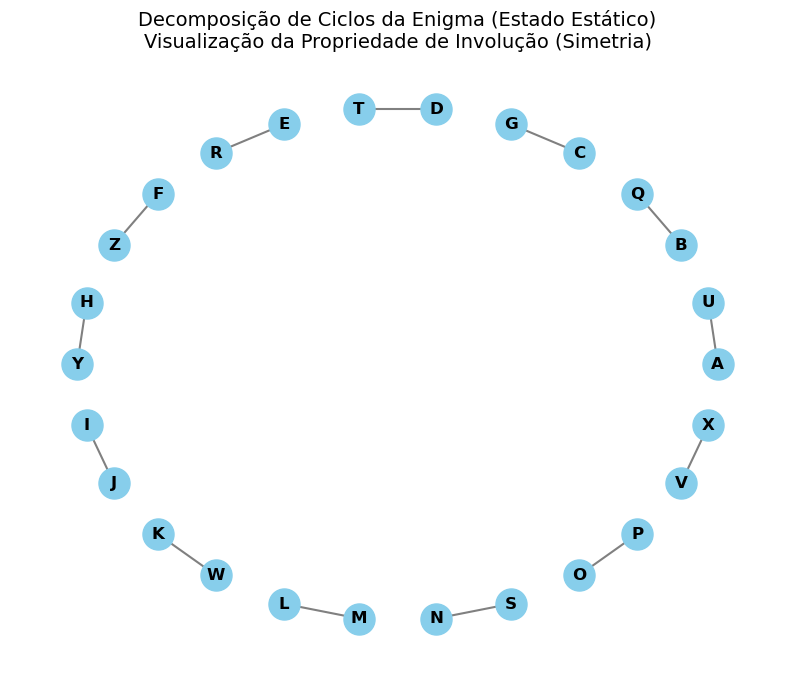

Verificação Algébrica:
Mapeamento A -> U
Mapeamento U -> A
Propriedade de Involução (E² = id) confirmada!


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_ciclos_enigma():
    # Configurar uma máquina em um estado específico
    # Usaremos uma configuração arbitrária
    rotores = [('III', 'K', 'A'), ('II', 'D', 'A'), ('I', 'O', 'A')]
    plugboard = "AV BS CG DL FU HZ IN KM OW RX"
    alfabeto = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    mapeamento = {}
    
    # Gerar o mapa de permutação completo para este estado estático
    # Precisamos contornar o mecanismo de rotação automática para ver o estado "congelado"
    # Faremos isso criando uma nova máquina para cada letra para demonstração
    
    for letra_entrada in alfabeto:
        # Cria uma máquina com o MESMO estado inicial para cada letra
        # Isso simula o comportamento instantâneo da permutação t_0
        temp_machine = Enigma(rotores, 'B', plugboard)
        # Para provar a reciprocidade (A->B logo B->A), precisamos que a máquina 
        # esteja exatamente no mesmo estado para ambas as letras.
        
        # Pular rotação:
        letra = letra_entrada
        letra = temp_machine.plugboard.cifrar(letra)
        for r in temp_machine.rotores: letra = r.cifrar(letra, False)
        letra = temp_machine.refletor.cifrar(letra)
        for r in reversed(temp_machine.rotores): letra = r.cifrar(letra, True)
        letra_saida = temp_machine.plugboard.cifrar(letra)
        
        mapeamento[letra_entrada] = letra_saida

    G = nx.Graph() 
    
    # Adiciona componentes do grafo
    for entrada, saida in mapeamento.items():
        if entrada != saida: # Enigma nunca mapeia para si mesma, vamos checar
            G.add_edge(entrada, saida)
    
    # Visualização
    plt.figure(figsize=(10, 8))
    pos = nx.circular_layout(G) 
    
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold')
    
    plt.title("Decomposição de Ciclos da Enigma (Estado Estático)\nVisualização da Propriedade de Involução (Simetria)", fontsize=14)
    plt.axis('off')
    plt.show()

    print("Verificação Algébrica:")
    print(f"Mapeamento A -> {mapeamento['A']}")
    print(f"Mapeamento {mapeamento['A']} -> {mapeamento[mapeamento['A']]}")
    if mapeamento[mapeamento['A']] == 'A':
        print("Propriedade de Involução (E² = id) confirmada!")

visualizar_ciclos_enigma()


---

## Referências

[1] Wikipedia. *Enigma (máquina)*. Disponível em: [https://pt.wikipedia.org/wiki/Enigma_(m%C3%A1quina)](https://pt.wikipedia.org/wiki/Enigma_(m%C3%A1quina))

[2] Brasil Escola. *Máquina Enigma*. Disponível em: [https://brasilescola.uol.com.br/historiag/maquina-enigma.htm](https://brasilescola.uol.com.br/historiag/maquina-enigma.htm)

[3] InfoEscola. *Enigma - Máquina de cifragem nazista*. Disponível em: [https://www.infoescola.com/segunda-guerra/enigma/](https://www.infoescola.com/segunda-guerra/enigma/)

[4] IMPA. *Raio-X desvenda os segredos da máquina decifrada por Turing*. Disponível em: [https://impa.br/notices/raio-x-desvenda-os-segredos-da-maquina-decifrada-por-turing/?lang=en](https://impa.br/notices/raio-x-desvenda-os-segredos-da-maquina-decifrada-por-turing/?lang=en)

[5] Atitude Reflexiva. *A Máquina Enigma*. Disponível em: [https://atitudereflexiva.wordpress.com/2015/12/14/a-maquina-enigma/](https://atitudereflexiva.wordpress.com/2015/12/14/a-maquina-enigma/)

[6] Crypto Museum. *Enigma wiring*. Disponível em: [https://www.cryptomuseum.com/crypto/enigma/wiring.htm](https://www.cryptomuseum.com/crypto/enigma/wiring.htm)

[7] Cipher Machines and Cryptology. *Enigma Tech Details*. Disponível em: [https://www.ciphermachinesandcryptology.com/en/enigmatech.htm](https://www.ciphermachinesandcryptology.com/en/enigmatech.htm)